## Problem Statement: AI in Workplace Productivity

To analyze how AI tool adoption, workload balance, collaboration, and employee well-being influence workplace productivity and burnout risk, and to build machine learning models that predict productivity levels and burnout categories using employee-level data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ai_productivity_features.csv")

In [3]:
df.head()

,Employee_ID,job_role,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
0,3c6ca882-3fa3-446b-8208-c92f3f306f06,Writer,19,11.8,28.5,19.2,1.4,High,1.9,2.3,0.20,2,7.1,4.8,10.00
1,02f168cc-7747-4dbd-a868-ea2cfb41e22a,Designer,4,10.8,24.1,23.3,2.6,Low,8.0,9.8,1.82,3,3.4,5.5,6.78
2,d39ce8c9-6e2a-4f86-b888-e2b5f4a18cf7,Developer,6,25.9,69.4,10.0,1.4,Medium,6.8,8.9,5.52,5,4.6,3.8,9.66
3,14511660-d78a-453f-9449-f17cd239ec27,Manager,20,7.9,17.2,25.1,0.2,High,3.5,8.6,1.14,5,5.6,3.9,10.00
4,0597f0bb-ed5a-4e35-94ac-3f0f6a5c2bc2,Developer,15,8.6,20.6,20.1,1.4,Low,5.9,5.3,2.75,10,1.0,7.4,5.38


In [4]:
df.shape

(4500, 15)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee_ID                   4500 non-null   str    
 1   job_role                      4500 non-null   str    
 2   experience_years              4500 non-null   int64  
 3   ai_tool_usage_hours_per_week  4500 non-null   float64
 4   tasks_automated_percent       4500 non-null   float64
 5   manual_work_hours_per_week    4500 non-null   float64
 6   learning_time_hours_per_week  4500 non-null   float64
 7   deadline_pressure_level       4500 non-null   str    
 8   meeting_hours_per_week        4500 non-null   float64
 9   collaboration_hours_per_week  4500 non-null   float64
 10  error_rate_percent            4500 non-null   float64
 11  task_complexity_score         4500 non-null   int64  
 12  focus_hours_per_day           4500 non-null   float64
 13  work_life_bala

In [6]:
df.describe()

,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,10.427556,10.349667,25.908467,22.372867,2.001756,6.571089,8.249311,2.097044,5.507556,4.694489,4.724689,8.354816
std,5.745073,5.808240,15.157930,6.465516,1.408176,4.683117,3.040733,1.519145,2.861737,1.337197,1.993201,1.813773
min,1.000000,0.000000,0.000000,10.000000,0.000000,1.000000,2.000000,0.100000,1.000000,1.000000,1.000000,3.220000
25%,6.000000,6.000000,14.500000,17.900000,1.000000,3.400000,6.200000,0.710000,3.000000,3.900000,3.300000,6.850000
50%,10.000000,9.700000,24.500000,22.500000,1.700000,5.700000,8.000000,2.000000,6.000000,4.800000,4.700000,9.035000
75%,15.000000,14.300000,36.000000,26.800000,2.700000,8.200000,10.000000,3.290000,8.000000,5.600000,6.200000,10.000000
max,20.000000,30.400000,79.900000,43.300000,11.500000,30.200000,20.000000,6.670000,10.000000,8.000000,10.000000,10.000000


In [7]:
df.isnull().sum()

Employee_ID                     0
job_role                        0
experience_years                0
ai_tool_usage_hours_per_week    0
tasks_automated_percent         0
manual_work_hours_per_week      0
learning_time_hours_per_week    0
deadline_pressure_level         0
meeting_hours_per_week          0
collaboration_hours_per_week    0
error_rate_percent              0
task_complexity_score           0
focus_hours_per_day             0
work_life_balance_score         0
burnout_risk_score              0
dtype: int64

# EDA

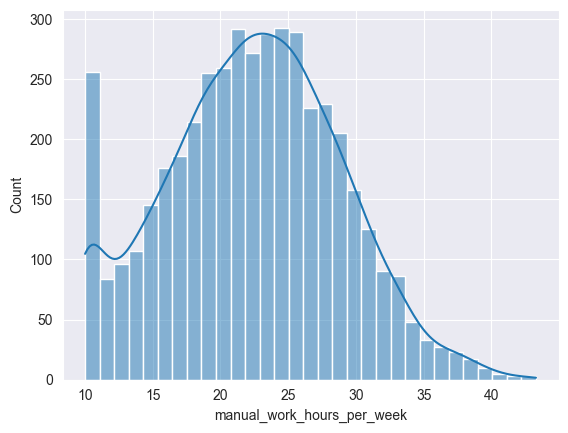

In [8]:
sns.histplot(df["manual_work_hours_per_week"], kde=True);

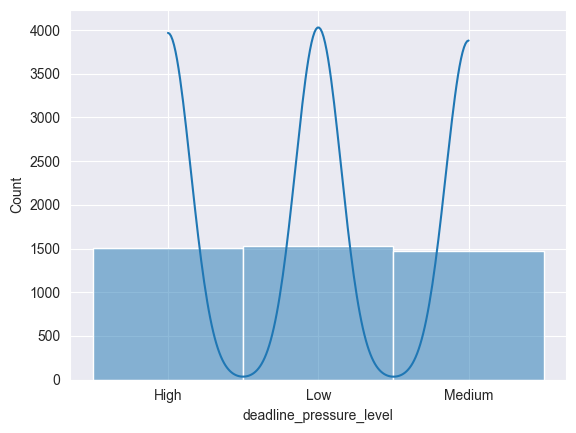

In [9]:
sns.histplot(df["deadline_pressure_level"], kde=True);

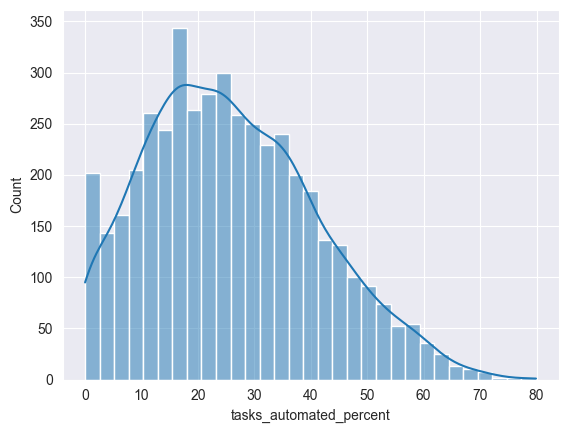

In [10]:
sns.histplot(df["tasks_automated_percent"], kde=True);

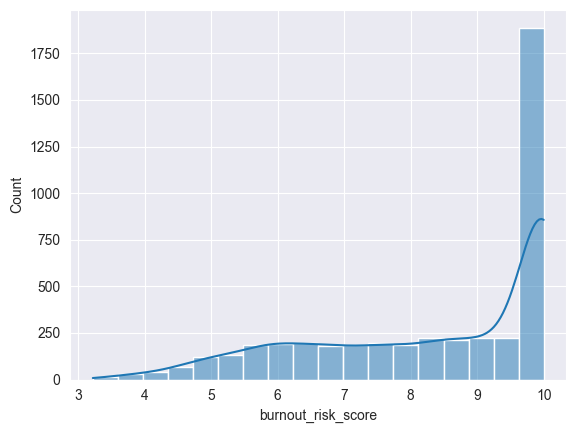

In [11]:
sns.histplot(df["burnout_risk_score"], kde=True);

In [12]:
df["burnout_risk_score"].describe()


count    4500.000000
mean        8.354816
std         1.813773
min         3.220000
25%         6.850000
50%         9.035000
75%        10.000000
max        10.000000
Name: burnout_risk_score, dtype: float64

In [13]:
(df["burnout_risk_score"] == 10).sum()

np.int64(1685)

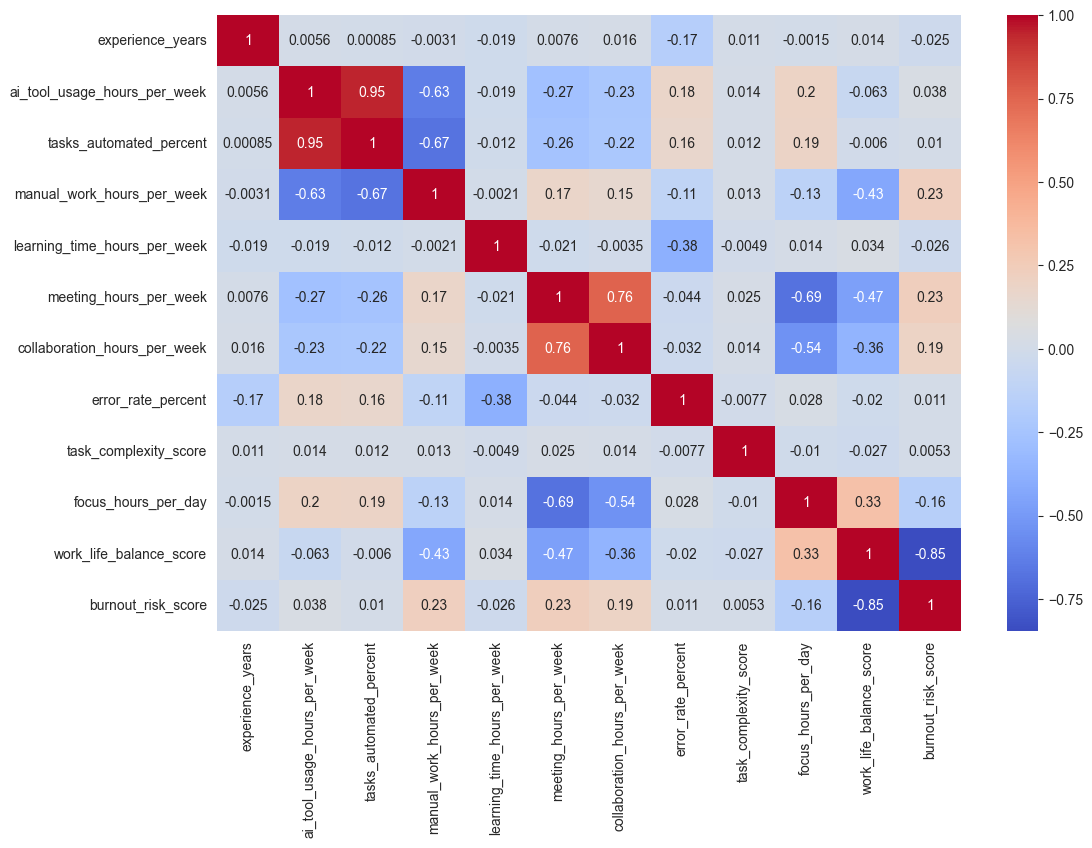

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm");


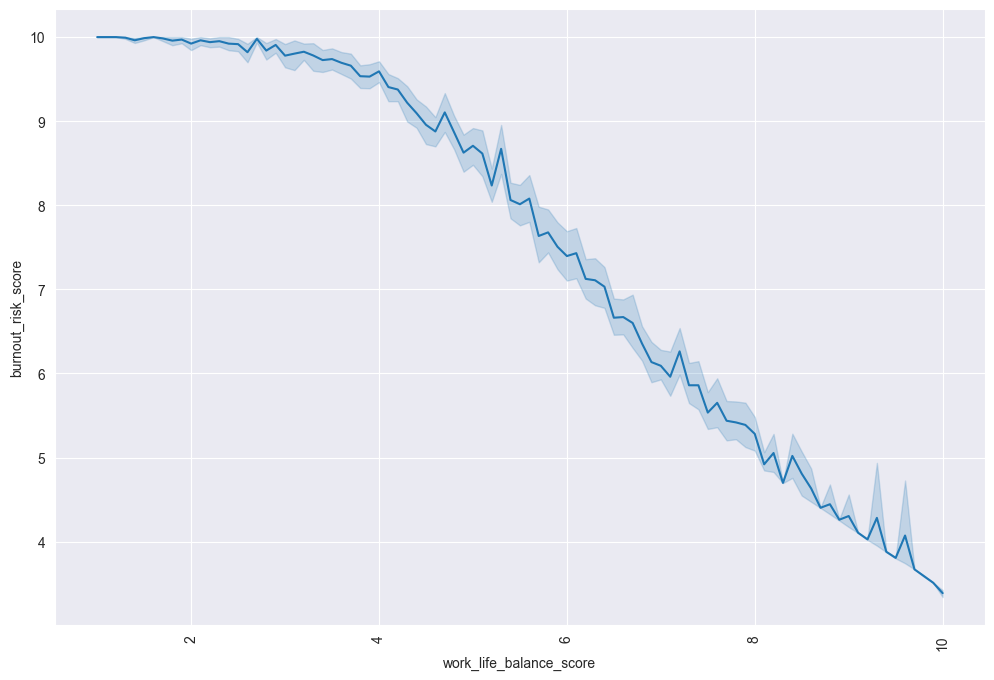

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="work_life_balance_score", y="burnout_risk_score")
plt.xticks(rotation=90);

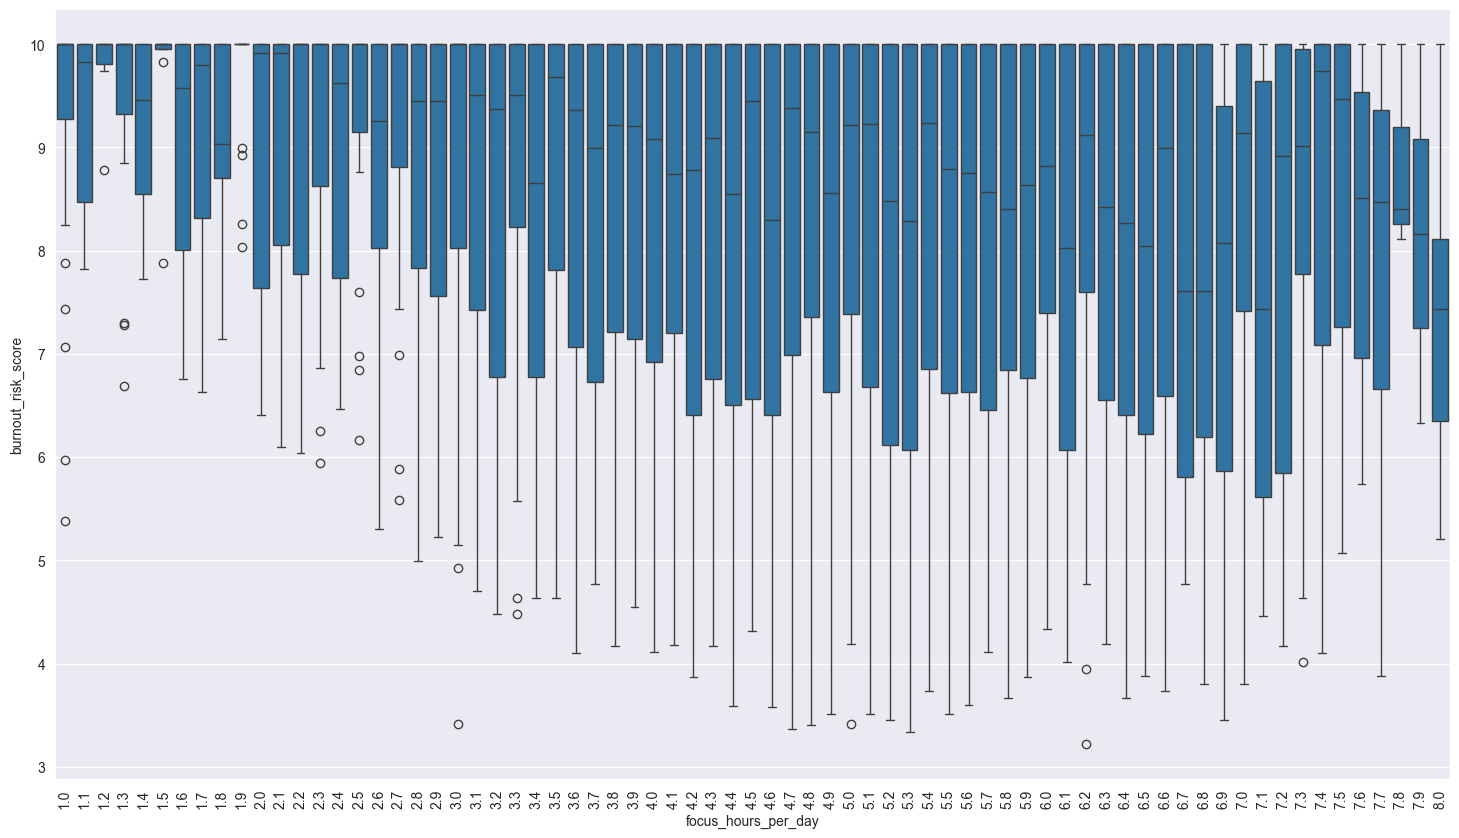

In [16]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df, x="focus_hours_per_day", y="burnout_risk_score");
plt.xticks(rotation=90);

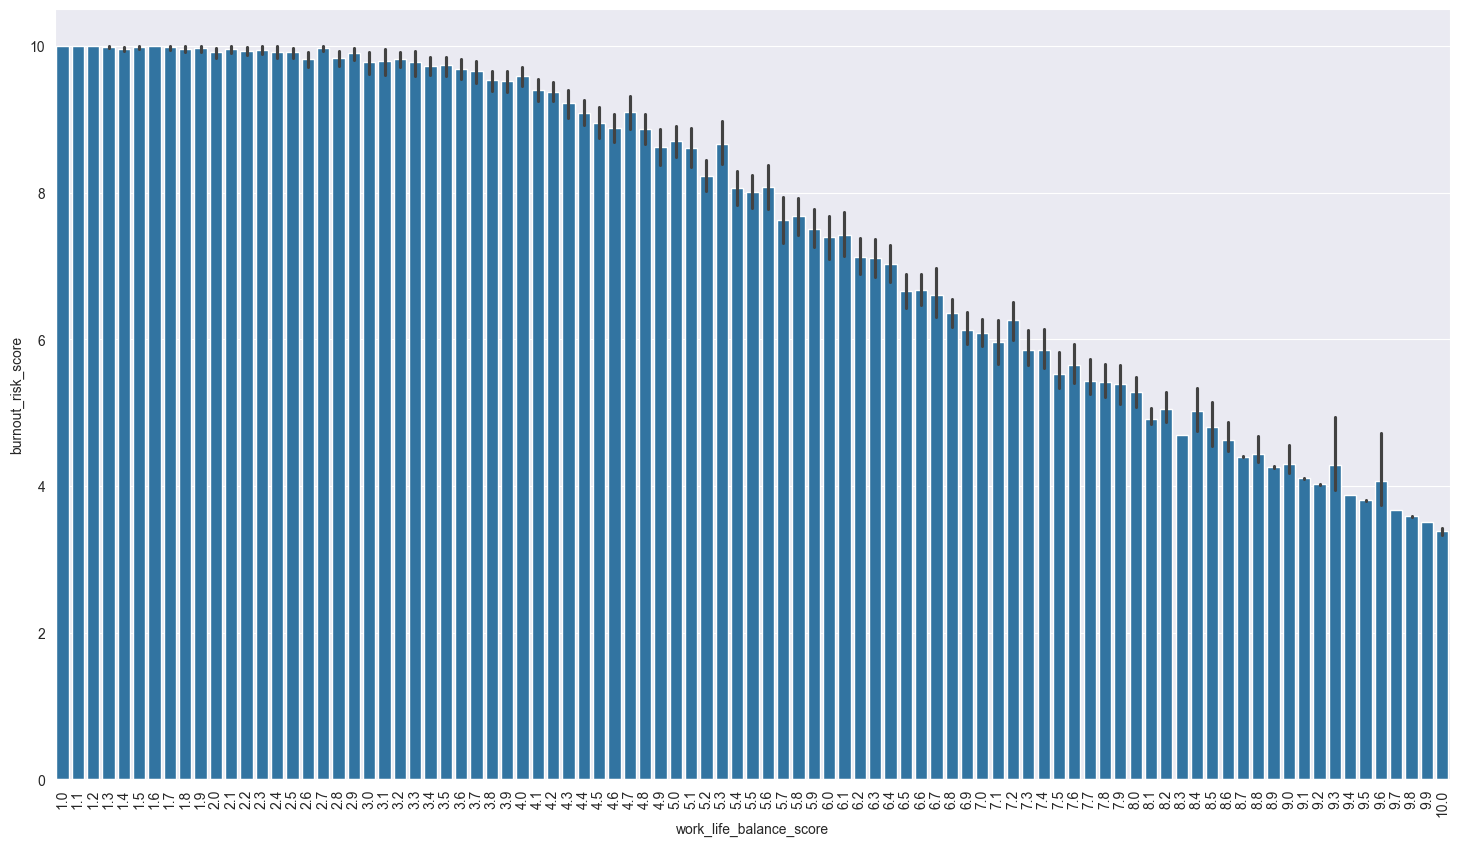

In [17]:
plt.figure(figsize=(18,10))
sns.barplot(data=df, x=df["work_life_balance_score"], y=df["burnout_risk_score"]);
plt.xticks(rotation=90);

In [18]:
df.columns

Index(['Employee_ID', 'job_role', 'experience_years',
       'ai_tool_usage_hours_per_week', 'tasks_automated_percent',
       'manual_work_hours_per_week', 'learning_time_hours_per_week',
       'deadline_pressure_level', 'meeting_hours_per_week',
       'collaboration_hours_per_week', 'error_rate_percent',
       'task_complexity_score', 'focus_hours_per_day',
       'work_life_balance_score', 'burnout_risk_score'],
      dtype='str')

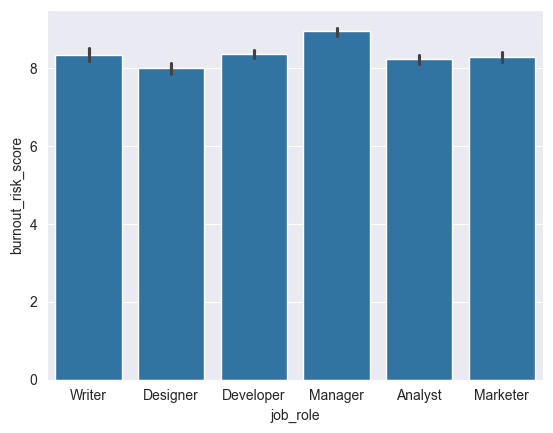

In [19]:
sns.barplot(data=df, x="job_role", y="burnout_risk_score");

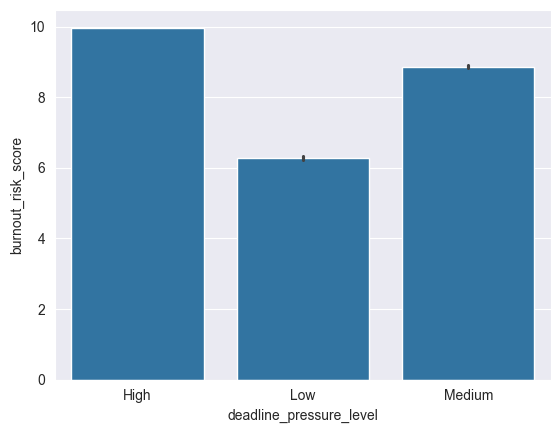

In [20]:
sns.barplot(data=df, x=df["deadline_pressure_level"], y=df["burnout_risk_score"]);

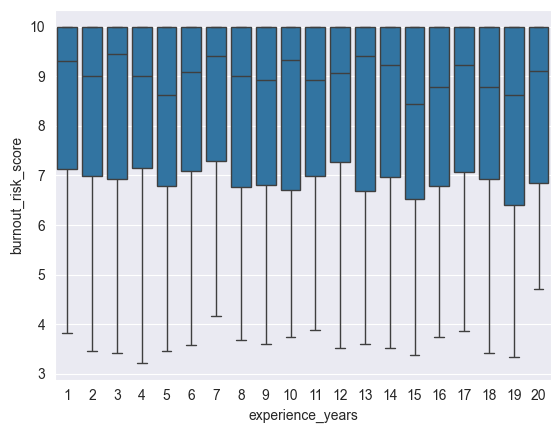

In [21]:
sns.boxplot(data=df, x=df["experience_years"], y=df["burnout_risk_score"]);

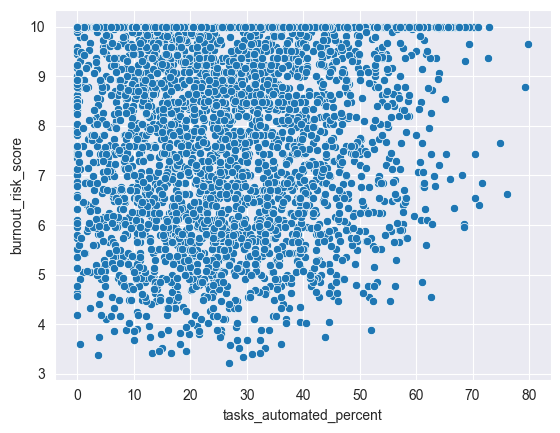

In [22]:
sns.scatterplot(data=df, x=df["tasks_automated_percent"], y=df["burnout_risk_score"]);

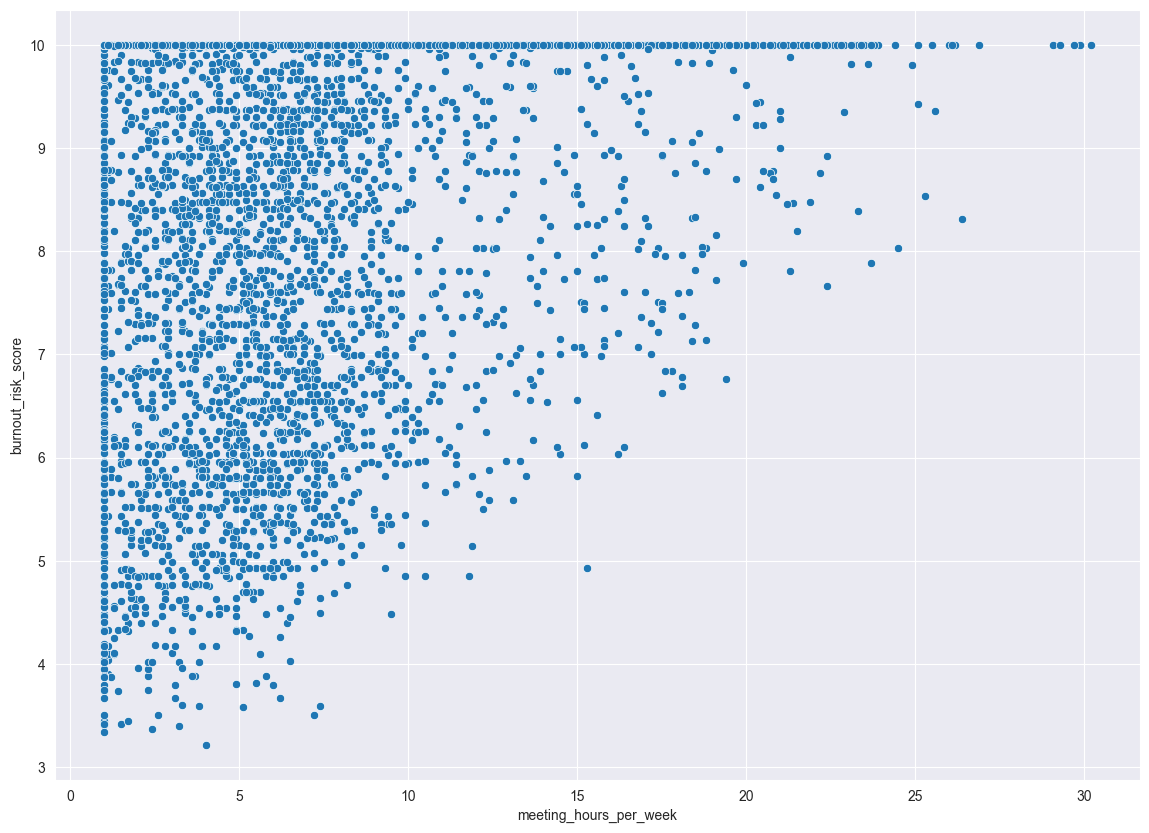

In [23]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=df, x=df["meeting_hours_per_week"], y=df["burnout_risk_score"]);

In [24]:
df = df.drop(columns=["Employee_ID"])

In [25]:
order = ["Low","Medium","High"]

df["deadline_pressure_level"] = pd.Categorical(
    df["deadline_pressure_level"],
    categories=order,
    ordered=True
).codes

df = pd.get_dummies(df, columns=["job_role"], drop_first=True)

In [26]:
df.head()

,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,burnout_risk_score,job_role_Designer,job_role_Developer,job_role_Manager,job_role_Marketer,job_role_Writer
0,19,11.8,28.5,19.2,1.4,2,1.9,2.3,0.20,2,7.1,4.8,10.00,False,False,False,False,True
1,4,10.8,24.1,23.3,2.6,0,8.0,9.8,1.82,3,3.4,5.5,6.78,True,False,False,False,False
2,6,25.9,69.4,10.0,1.4,1,6.8,8.9,5.52,5,4.6,3.8,9.66,False,True,False,False,False
3,20,7.9,17.2,25.1,0.2,2,3.5,8.6,1.14,5,5.6,3.9,10.00,False,False,True,False,False
4,15,8.6,20.6,20.1,1.4,0,5.9,5.3,2.75,10,1.0,7.4,5.38,False,True,False,False,False


In [27]:
X = df.drop("burnout_risk_score", axis=1)
y = df["burnout_risk_score"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
num_cols = [
    "experience_years",
    "ai_tool_usage_hours_per_week",
    "tasks_automated_percent",
    "manual_work_hours_per_week",
    "learning_time_hours_per_week",
    "deadline_pressure_level",
    "meeting_hours_per_week",
    "collaboration_hours_per_week",
    "error_rate_percent",
    "task_complexity_score",
    "focus_hours_per_day",
    "work_life_balance_score"
]


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


In [31]:
X_train

,experience_years,ai_tool_usage_hours_per_week,tasks_automated_percent,manual_work_hours_per_week,learning_time_hours_per_week,deadline_pressure_level,meeting_hours_per_week,collaboration_hours_per_week,error_rate_percent,task_complexity_score,focus_hours_per_day,work_life_balance_score,job_role_Designer,job_role_Developer,job_role_Manager,job_role_Marketer,job_role_Writer
4137,1.306218,-1.065621,-0.976569,0.290446,-0.707513,1.235028,0.789943,1.370177,0.250005,0.516107,-1.380784,-0.716884,False,False,True,False,False
3525,-1.137305,-0.048230,0.165651,-1.317678,-0.356002,-1.210572,-0.365499,0.134147,1.368918,-0.879562,0.824158,2.056631,False,False,False,False,True
2652,-1.660917,0.917428,1.578571,-1.905261,0.417322,1.235028,-1.184812,-0.744084,1.600646,-0.879562,1.779633,0.795943,False,False,False,False,True
605,0.782606,-0.582791,0.152446,-1.580544,0.276717,-1.210572,-0.092395,-1.231991,-1.319122,0.167189,-0.057818,2.510479,True,False,False,False,False
2194,0.608069,0.951916,1.123004,-1.858873,0.698530,0.012228,-0.680619,-0.126070,-1.021187,1.213941,-0.425309,1.199363,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,-0.962767,1.486477,1.987922,-1.905261,-0.285700,-1.210572,0.054662,-0.256178,0.481732,-0.181728,-0.792799,1.148936,False,True,False,False,False
466,-0.090081,-0.548303,-0.791701,0.012117,1.190646,-1.210572,-0.260459,0.101620,-1.319122,0.516107,1.118151,1.249791,False,True,False,False,False
3092,-0.613693,-1.048377,-0.785099,0.135819,0.206415,-1.210572,-0.596587,-1.882533,0.912084,0.516107,-0.204815,1.754066,True,False,False,False,False
3772,1.131681,0.520819,0.079820,-0.018809,-1.199629,0.012228,-0.974732,0.069093,0.812772,-0.879562,0.971154,0.190812,False,True,False,False,False


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([ 7.30007894,  9.60940407,  6.90089495,  8.78621162,  8.52966037,
        4.58761052,  7.97031976,  6.02414206,  7.65504044, 10.57083715,
        8.94940513, 11.27898209,  6.85192802,  7.99853874,  5.88100396,
        5.62767843,  6.24659315,  5.80088177,  9.57170473,  8.79949872,
        5.95101844,  6.2418136 ,  8.49616796, 10.77063072, 10.55299446,
       10.87903384,  9.7486159 , 10.5187639 ,  6.93005822, 10.48949941,
       10.38218179,  9.40450881,  8.8072314 ,  6.3316421 ,  9.54523915,
        7.43028494,  7.45251093,  7.06060864,  9.74035446,  9.95800111,
        6.36063242,  7.3090462 ,  5.42089078,  9.92396182, 10.82614699,
        8.95206542,  7.49180144,  8.97499593, 10.74483107,  8.44478072,
        6.90179629,  8.54508144,  7.62569178,  8.70604148, 10.66609678,
        7.42222303, 10.49246889,  6.69451366,  6.7945904 ,  7.00675859,
        7.84072331, 10.34928518,  6.01338235,  9.00815298,  7.01211606,
        5.67898301,  7.14566457,  8.73674005,  9.56887226,  6.83

In [35]:
y_test

2323     7.28
3686    10.00
2974     6.77
2992     9.45
468      9.24
        ...  
911      7.88
809     10.00
2940    10.00
3710    10.00
3257     5.65
Name: burnout_risk_score, Length: 900, dtype: float64

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 0.49450454734684635
MSE: 0.3484169244680479
R2 Score: 0.8987876538028747


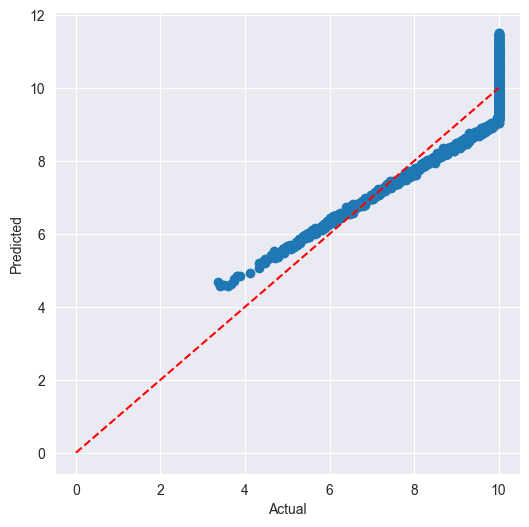

In [37]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([0,10],[0,10],'r--')

In [38]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring="r2"
)

grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parame

In [40]:
best_rf = grid.best_estimator_

y_pred_rf = best_rf.predict(X_test)

In [41]:
y_pred_rf

array([ 7.51335,  9.84565,  6.9098 ,  9.43555,  9.25135,  4.6104 ,
        8.1977 ,  5.6941 ,  7.952  ,  9.95615,  9.78235,  9.97395,
        6.8314 ,  8.1727 ,  5.48535,  5.0652 ,  6.03175,  5.41785,
        9.8913 ,  9.46355,  5.68755,  5.9868 ,  9.12605,  9.9127 ,
        9.91185,  9.98785,  9.94475,  9.98785,  6.7504 ,  9.9198 ,
        9.97645,  9.8371 ,  9.6178 ,  5.99425,  9.90005,  7.5635 ,
        7.68675,  7.3916 ,  9.87685,  9.91315,  6.15955,  7.50305,
        4.84515,  9.94015,  9.9929 ,  9.7974 ,  7.7528 ,  9.7963 ,
        9.9758 ,  9.1657 ,  7.04075,  9.1902 ,  7.89395,  9.3894 ,
        9.95975,  7.5218 ,  9.9702 ,  6.8917 ,  6.53205,  7.03175,
        8.34545,  9.95345,  5.61085,  9.53035,  7.1982 ,  5.40425,
        7.1915 ,  9.32345,  9.9435 ,  6.98095,  7.6163 ,  7.44085,
        9.87095,  9.9811 ,  7.12115,  4.03045,  9.93705,  8.9648 ,
        4.8258 ,  9.9573 ,  5.99345,  9.9602 ,  7.5641 ,  9.95295,
        7.87045,  9.86595,  9.0897 ,  5.25805,  7.63455,  9.13

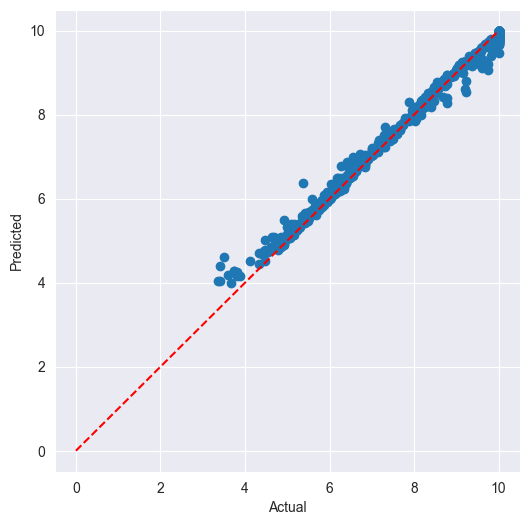

In [42]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([0,10],[0,10],'r--')

In [43]:
import pandas as pd

pd.Series(best_rf.feature_importances_, index=X_train.columns)\
    .sort_values(ascending=False).head(10)

deadline_pressure_level         0.468544
work_life_balance_score         0.393647
manual_work_hours_per_week      0.032584
meeting_hours_per_week          0.028194
ai_tool_usage_hours_per_week    0.014831
collaboration_hours_per_week    0.014802
focus_hours_per_day             0.010679
tasks_automated_percent         0.010586
error_rate_percent              0.005198
learning_time_hours_per_week    0.005070
dtype: float64

In [44]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [45]:
y_pred_knn = knn.predict(X_test)

In [46]:
y_pred_knn

array([ 7.588,  9.874,  7.458,  9.578,  8.8  ,  4.532,  8.22 ,  6.674,
        7.922, 10.   ,  9.574, 10.   ,  6.89 ,  7.996,  5.94 ,  5.52 ,
        6.27 ,  6.224,  9.664,  8.968,  6.416,  5.496,  8.786, 10.   ,
       10.   , 10.   ,  9.724, 10.   ,  7.224, 10.   , 10.   ,  9.79 ,
        9.508,  5.632,  9.856,  6.952,  8.226,  6.192,  9.966,  9.994,
        6.42 ,  7.504,  5.042, 10.   , 10.   ,  9.542,  7.438,  9.486,
       10.   ,  9.166,  7.664,  9.236,  7.914,  9.356, 10.   ,  7.494,
       10.   ,  7.038,  6.504,  7.588,  8.548, 10.   ,  5.644,  9.904,
        7.716,  5.73 ,  6.592,  9.516, 10.   ,  6.85 ,  7.868,  6.98 ,
        9.978, 10.   ,  7.114,  4.564,  9.816,  8.716,  5.388, 10.   ,
        6.446,  9.818,  7.612, 10.   ,  7.944,  9.438,  9.112,  5.744,
        7.95 ,  9.182,  6.548,  5.086,  5.674, 10.   ,  8.432, 10.   ,
        7.23 ,  8.132,  9.08 ,  9.994,  6.934,  6.916,  5.408, 10.   ,
       10.   ,  9.964,  9.934,  8.738,  9.876, 10.   ,  5.762,  8.624,
      

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Linear Regression
y_pred_lr = model.predict(X_test)

#Random Forest (Grid Search Best)
y_pred_rf = best_rf.predict(X_test)

#KNN
y_pred_knn = knn.predict(X_test)

def print_scores(name, y_true, y_pred):
    print(f"\n{name} Results")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))

# Print all scores
print_scores("Linear Regression", y_test, y_pred_lr)
print_scores("Random Forest (Grid)", y_test, y_pred_rf)
print_scores("KNN Regressor", y_test, y_pred_knn)


Linear Regression Results
MAE: 0.49450454734684635
MSE: 0.3484169244680479
R2 Score: 0.8987876538028747

Random Forest (Grid) Results
MAE: 0.09599627777777726
MSE: 0.023025707019444303
R2 Score: 0.9933112151947162

KNN Regressor Results
MAE: 0.26885777777777775
MSE: 0.16403931555555554
R2 Score: 0.9523478831537905


In [49]:
from sklearn.metrics import r2_score

# Number of samples and features
n = X_test.shape[0]
p = X_test.shape[1]

# Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
adj_r2_lr = 1 - ((1 - r2_lr) * (n - 1) / (n - p - 1))

#Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - p - 1))

#KNN
r2_knn = r2_score(y_test, y_pred_knn)
adj_r2_knn = 1 - ((1 - r2_knn) * (n - 1) / (n - p - 1))

print("Adjusted R2 - Linear Regression:", adj_r2_lr)
print("Adjusted R2 - Random Forest:", adj_r2_rf)
print("Adjusted R2 - KNN:", adj_r2_knn)

Adjusted R2 - Linear Regression: 0.8968368489442
Adjusted R2 - Random Forest: 0.9931822930386053
Adjusted R2 - KNN: 0.9514294183166186


In [50]:
import joblib

# Save trained Random Forest model
joblib.dump(best_rf, "burnout_random_forest.joblib")

# Save scaler (since you used scaling before training)
joblib.dump(scaler, "scaler.joblib")

# Save column structure (important because of get_dummies)
joblib.dump(X_train.columns.tolist(), "rf_columns.joblib")

['rf_columns.joblib']

In [51]:
import joblib

# Load objects
model = joblib.load("burnout_random_forest.joblib")
scaler = joblib.load("scaler.joblib")
columns = joblib.load("rf_columns.joblib")